In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import datetime

In [20]:
handwritten_digits = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = handwritten_digits.load_data()

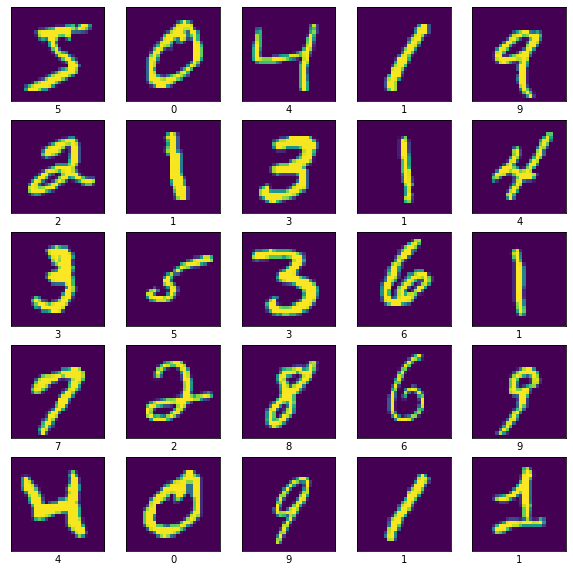

In [21]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

In [22]:
X_train = X_train.reshape(X_train.shape[0], (X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape(X_test.shape[0], (X_test.shape[1] * X_test.shape[2]))

In [23]:
X_train = X_train/255.0
X_test = X_test/255.0

In [24]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Softmax())

In [25]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [26]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)

In [27]:
log_directory = 'logs\\fit'

timestamp = datetime.datetime.now().strftime("%Y-%m-%d--%H%M")
log_directory = log_directory + "\\" + timestamp

board = tf.keras.callbacks.TensorBoard(log_dir=log_directory, histogram_freq=1, write_graph=True, write_images=True, update_freq='epoch', profile_batch=2, embeddings_freq=1)

In [28]:
model.fit(x=X_train, y=y_train, batch_size=100, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop, board])

Epoch 1/600
  1/600 [..............................] - ETA: 0s - loss: 2.3032 - accuracy: 0.1000WARNING:tensorflow:From F:\Softwares\Installations\.python-venv\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
600/600 [==============================] - 9s 15ms/step - loss: 1.6502 - accuracy: 0.8329 - val_loss: 1.5369 - val_accuracy: 0.9309
Epoch 2/600
600/600 [==============================] - 4s 7ms/step - loss: 1.5459 - accuracy: 0.9227 - val_loss: 1.5155 - val_accuracy: 0.9472
Epoch 3/600
600/600 [==============================] - 4s 7ms/step - loss: 1.5289 - accuracy: 0.9370 - val_loss: 1.5101 - val_accuracy: 0.9528
Epoch 4/600
600/600 [==============================] - 4s 7ms/step - loss: 1.5177 - accuracy: 0.9471 - val_loss: 1.5028 - val_accuracy: 0.9604
Epoch 5/600
600/600 [=========================

In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 1.4826 - accuracy: 0.9784


In [30]:
pred = model.predict(X_test)

In [31]:
print(np.argmax(pred[0]), y_test[0])

7 7


In [32]:
pred = np.argmax(pred, axis=1)

In [33]:
print(confusion_matrix(y_test, pred))

[[ 971    1    0    0    0    1    4    2    1    0]
 [   0 1123    2    2    0    1    3    1    3    0]
 [   3    2 1011    1    3    0    1    8    3    0]
 [   0    0    4  983    0    5    0    9    3    6]
 [   0    0    1    0  960    0    9    3    1    8]
 [   4    1    0    6    1  867    5    2    3    3]
 [   7    2    0    0    1    3  944    0    1    0]
 [   2    2    9    3    0    0    0 1011    0    1]
 [   4    0    6    4    3    2    5    6  941    3]
 [   4    3    1    4    8    2    0   10    4  973]]


In [34]:
print(classification_report(y_test, pred))

precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.97      0.99      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [35]:
model.save('mnistDigits.h5')

In [37]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'model_export')